# Program 7 - EMA: Expectation Maximization Algorithm

Observation: The GMM using EM algorithm based clustering matched the true label more closely than the K-MEANS


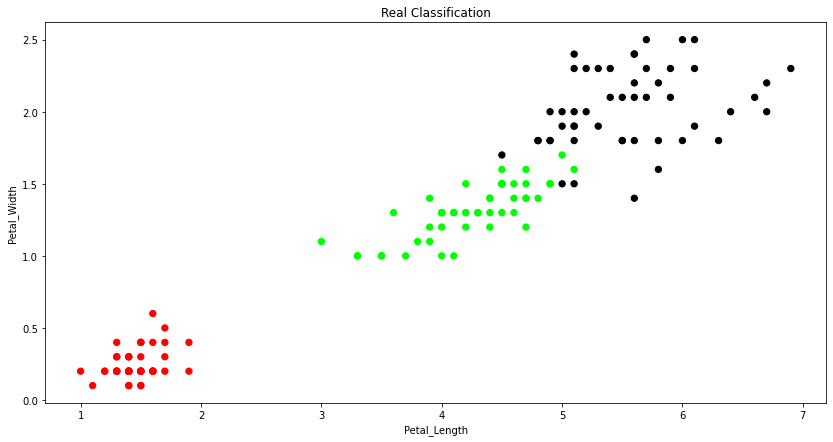

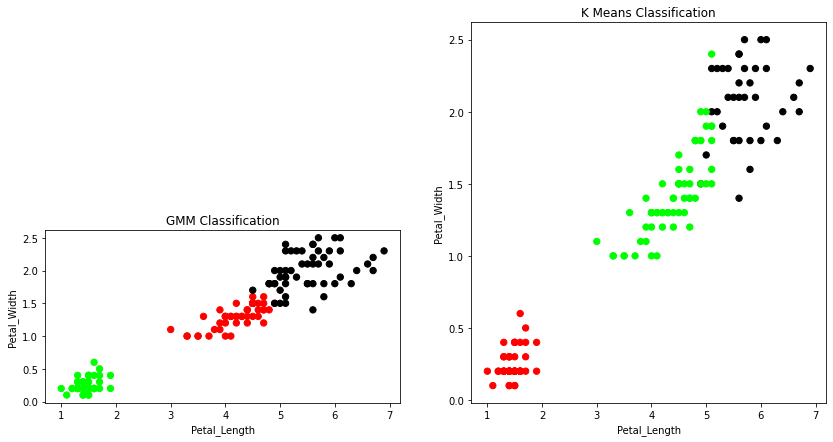

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture

iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = ["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]

y = pd.DataFrame(iris.target)
y.columns = ["Targets"]

model = KMeans(n_clusters = 3)
model.fit(X)
model.labels_

plt.figure(figsize = (14, 7))
colormap = np.array(["red", "lime", "black"])
plt.subplot(1, 1, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[y.Targets], s = 40)
plt.title("Real Classification")
plt.xlabel("Petal_Length")
plt.ylabel("Petal_Width")
plt.figure(figsize = (14, 7))
predY = np.choose(model.labels_, [0, 1, 2]).astype(np.int64)
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[predY], s = 40)
plt.title("K Means Classification")
plt.xlabel("Petal_Length")
plt.ylabel("Petal_Width")
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)

gmm = GaussianMixture(n_components = 3)
gmm.fit(xs)
y_cluster_gmm = gmm.predict(xs)
plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[y_cluster_gmm], s = 40)
plt.title("GMM Classification")
plt.xlabel("Petal_Length")
plt.ylabel("Petal_Width")

print("Observation: The GMM using EM algorithm based clustering matched the true label more closely than the K-MEANS")